# Artificial Neural Networks

ToDo: general explanation of neuroscientific aspects of neural networks and a draft explaining synapses, neurons, layers and activation functions.

## Content

ToDo: Hyperlinks to respective cells

* Introduction
* Theoretical aspects of neural networks
* Activation functions
* Loss functions
* Optimizers
* Metrics
* Example: implementation in Keras

### How do they work?

Neurons learn to pay attention to specific parts of the input space. For example, the relationship between $X_1,X_7$ and $X_9$. This, along with the activation functions, allow neural networks to learn nonlinear functions that model the process.

### How do they learn? Backpropagation

The errors are propagated back to the weights, usually through gradient descent.

$$\Delta W = W - \eta\frac{\partial L}{\partial W}$$

<img src='resources/gd.png'>

The training algorithm works in the following way:

1. Randomly initialize weights to small numbers close to 0.
2. Input the first observation of the dataset in the input layer, each feature in one input node.
3. Forward-propagation: from left to right, the neurons are activated until getting the predicted result $y$.
4. Compare the predicted result to the actual result. Measure the generated error.
5. Back-propagation: from right to left, the error is propagated. Update the weights according to how much they are responsible for the error and the learning rate.
6. Repeat steps 2 to 5 and update the weights after each observation (Stochastic learning) or repeat steps 2 to 5 only after a batch of observations (Batch learning).
7. When the whole training set passed through the ANN, that makes an epoch. Redo more epochs.

### References

* https://www.udemy.com/deeplearning/learn/v4/overview
* http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf
* https://stats.stackexchange.com/questions/154879/a-list-of-cost-functions-used-in-neural-networks-alongside-applications

# Efficient Neural Network Learning

*Based on Yann LeCun's paper [Efficient Backpropagation](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf)*

## Learning Mechanisms

### Batch Gradient Descent

The weight update is given by the true average gradient, found by calculating the errors across all of the training samples.

* Conditions of **convergence** are **well understood**.
* Can be accelerated through techniques such as **conjugate gradient**
* Theoretical analysis of **weight dynamics** and convergence rates are simpler.

### Stochastic Gradient Descent

The weight update is given by an estimate of the true gradient, based on the error of each training sample. 

* It is usually **faster** than BGD, especially in large training sets. 
* Often results in **better minima** than BGD 
* Can be used to **track changes** in the system. 
* However, SGD is very noisy, which prevents it from reaching the global minima. To reduce this noise you could lower the training rate or have an adaptive batch size.

### Minibatch Gradient Descent

Is a mixture between BGD and SGD, in which learning starts with a small batch and increases its size as the training proceeds.

## Efficient Learning Heuristics

### Maximum Information Content 

"Networks learn the fastest from the most unexpected samples." 

* Shuffle the training set so that successive training examples rarely belong to the same class.
* Present input examples that produce a large error more frequently than examples that produce small errors.

Be careful when perturbing the natural frequency of data.

* If the example is an outlier, increasing the frequency of it can be disastrous.
* If the example is an infrequently ocurring input, for examples in unbalanced datasets, this could be beneficial.

### Input Normalization

"Convergence is faster if the inputs are normalized, scaled and uncorrelated."

* Normalize input variables such that the average of each variable across all training samples is close to zero. Substracting the means creates lower eigenvalues, which speeds up convergence.
* Apply principal components analysis (also known as Karhunen-Loeve expansion) to remove linear correlations in inputs. This decorrelation diagonalizes the Hessian of the weights matrices, making the learning rate per weight optimal.
* Scale input variables such that their covariances are all similar, unless it is known that some inputs are less significant than others, in which case they should be downscaled to be made less visible to the learning process. This also creates lower eigenvalues, which speeds up convergence.

<img src='resources/normalization.png'>

### Activation Functions

"Nonlinear activation functions are what give neural networks their nonlinear capabilities."

* Symmetric sigmoid about the origin (such as hyperbolic tangent) often converge faster than the standard logistic function.
* Sometimes it is helpful to add a small linear term, such as $f(x)=\text{tanh}(x)+ax$  in order to avoid flat spots.

Unlike sigmoids, radial basis functions cover a small local region of the input space.

* Can learn faster.
* May form a better set of basis functions to model the input space.
* In high-dimensional spaces, many RBF units are needed to cover the spaces.
* Use sigmoid functions in lower layers (higher dimensions).
* Use radial basis functions in higher layer (lower dimensions).
* Radial basis functions are usually trained by a combination of gradient descent (for output units) and unsupervised clustering (for determining the means and widths of the RBF units).

### Weight Initialization

"Weights should be chosen randomly, but in such a way that the sigmoid function is primarily activated in its linear region."

Assuming that the training set has been normalized and a symmetric sigmoid function has been used, the weights should be randomly drawn from a distribution with mean zero and standard deviation given by:

$$ \sigma_w = \frac{1}{\sqrt{m}} $$
 
Where $m$ is the number of connections feeding into the node.

### Learning Rates

"The main philosophy is to make sure that all the weights in the network converge roughly at the same speed."

* Give each weight its own learning rate.
* Learning rates should be proportional to the square root of the number of inputs to the unit.
* Learning rates in lower layers should typically be larger than in the higher layers.
* Momentum can increase the speed in highly nonspherical cost surfaces because it damps the size of the steps along directions of high curvature, thus yielding a larger effective rate along the directions of low curvature.

There exists an optimal learning rate $\eta_{opt}$, and is given by:

$$\eta_{opt} = H^{-1}$$

Where $H$ is the Hessian matrix:

$$H_{ij}=\frac{\partial^2E}{\partial W_i\partial W_j}$$

with $1 \geq i,j \geq N$ and $N$ equal to the total number of weights.

If the weights are coupled, $H$ must be rotated first such that it is diagonal (coordinate axes line up with the eigenvectors).

Let $\Theta$ be the rotation matrix such that

$$ \Lambda = \Theta H \Theta^T $$

where $\Lambda$ is diagonal and $\Theta^T\Theta = I$

The optimal learning rate for each weight (which is now independent of the others thanks to the diagonalization) is given by:

$$\eta_{opt, i} = \frac{1}{\lambda_i}$$

Convergence is proportional to the *condition number* $ k = \frac{\lambda_{max}}{\lambda_{min}} $

Therefore, it is desirable to have a small eigenvalue spread.

# Activation Functions

### Threshold function

Useful when the output $y$ is binary.

$$\phi(x)=\begin{cases} 
              1 & x\geq 0 \\
              0 & x<0 
   \end{cases}$$
   
### Sigmoid function   

Useful when the output $y$ is binary. Can be used for binary output layers.

$$\phi(x)=\frac{1}{1+e^{-x}}$$

### Rectifier linear unit

When is it useful?

$$\phi(x)=\text{max}(x,0)$$

### Hyperbolic Tangent Function

When is it useful?

$$\phi(x)=\text{tanh}(x)=\frac{1-e^{-2x}}{1+e^{-2x}}$$

### Softmax Function

Useful for multinomial output layers. Works as a sigmoid function for multiple dimensions.

$$\phi(x)=\frac{e^x}{\sum_je^x}$$

---

## Keras Activation Functions

https://keras.io/activations/

`from keras import activations`

ToDo: Web Scrape to keep list updated.

* softmax
* elu
* selu
* softplus
* softsign
* relu
* tanh
* sigmoid
* hard_sigmoid
* exponential
* linear

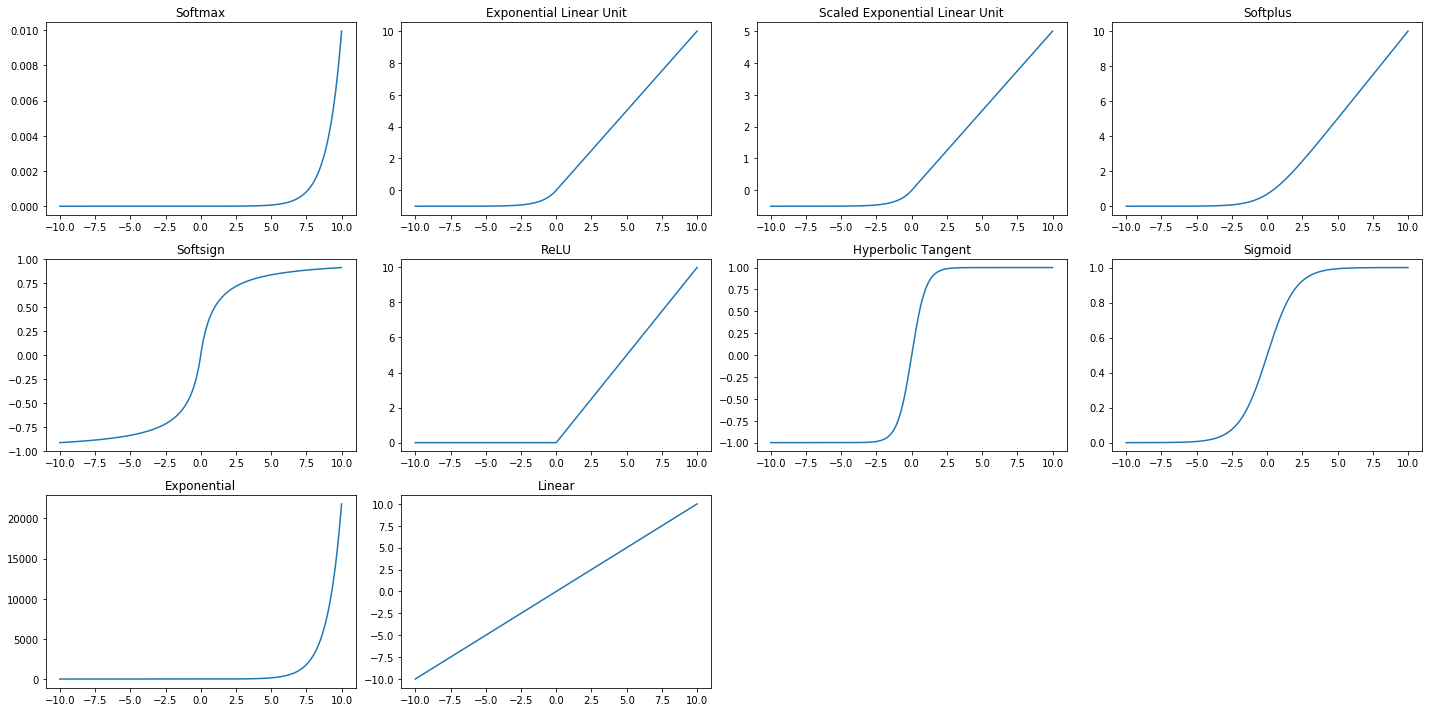

In [34]:
import matplotlib.pyplot as plt
import numpy as np

def softmax(x):
    return np.exp(x)/sum(np.exp(x))

def threshold(x):
    return np.piecewise(x, [x >= 0, x < 0], [1, 0])

def sigmoid(x):
    return 1/(1+np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

def elu(x, alpha=1.0):
    return np.piecewise(x, [x >= 0, x < 0], [lambda x: x, lambda x: alpha*(np.exp(x)-1)])

def selu(x, scale=0.5, alpha=1.0):
    return scale*elu(x, alpha)

def softplus(x):
    return np.log(np.exp(x) + 1)

def softsign(x):
    return x/(np.abs(x)+1)

def exponential(x):
    return np.exp(x)

def linear(x):
    return x

titles = ['Softmax', 'Exponential Linear Unit', 'Scaled Exponential Linear Unit', 'Softplus',
          'Softsign', 'ReLU', 'Hyperbolic Tangent', 'Sigmoid',
          'Exponential', 'Linear']

x = np.arange(-10, 10, 0.01)

y = [softmax(x), elu(x), selu(x), softplus(x), 
     softsign(x), relu(x), tanh(x), sigmoid(x), 
     exponential(x), linear(x)]

cols = 4
rows = np.ceil(len(titles)/cols)

fig = plt.figure(figsize=(20, 10))
for i in range(len(titles)):
    fig.add_subplot(rows, cols, i+1, title=titles[i]).plot(x, y[i])

plt.tight_layout()
plt.show()

In [14]:
?fig.add_subplot

# Loss Functions

### Quadratic loss

Also known as *mean squared error*, *maximum likelihood* and *sum squared error*.

$$L=\frac{1}{2}\sum_j(\hat{y}-y)^2$$

$$\nabla_{\hat{y}}L=(\hat{y}-y)$$

### Cross-entropy loss

Also known as *Bernoulli negative log-likelihood* and *binary cross-entropy*.

$$L=-\sum_j[y\ln(\hat{y})+(1-y)\ln(1-\hat{y})]$$

$$\nabla_{\hat{y}}L=\frac{\hat{y}-y}{\hat{y}(1-\hat{y})}$$

### Exponential loss

$\tau$ is a hyperparameter of the loss function.

$$L=\tau\exp(\frac{1}{\tau}\sum_j(\hat{y}-y)^2)$$

$$\nabla_{\hat{y}}L=\frac{2}{\tau}(\hat{y}-y)L$$

### Hellinger distance

Requires positive values for $\hat{y}$ and $y$, and ideally between $0$ and $1$.

$$L=\frac{1}{\sqrt{2}}\sum_j(\sqrt{\hat{y}}-\sqrt{y})^2$$

$$\nabla_{\hat{y}}L=\frac{\sqrt{\hat{y}}-\sqrt{y}}{\sqrt{2}\sqrt{\hat{y}}}$$

### Kullback-Leibler divergence loss

Also known as *information divergence*, *information gain*, *relative entropy*, *KLIC*, or *KL divergence*.

The Kullback-Leibler divergence is a measure of the information lost when $Q$ is used to approximate $P$ and is given by:

$$D_{KL}(P\parallel Q)=\sum_iP(i)\ln\frac{P(i)}{Q(i)}$$

The loss is given by setting $P=y$ and $Q=\hat{y}$

$$L=\sum_jy\ln\frac{y}{\hat{y}}$$

$$\nabla_{\hat{y}}L=-\frac{y}{\hat{y}}$$

### Generalized Kullback-Leibler divergence loss

$$L=\sum_jy\ln\frac{y}{\hat{y}}-\sum_jy+\sum_j\hat{y}$$

$$\nabla_{\hat{y}}L=\frac{\hat{y}-y}{\hat{y}}$$

### Itakura-Saito distance

$$L=\sum_j\big(\frac{y}{\hat{y}}-\log\frac{y}{\hat{y}}-1\big)$$

$$\nabla_{\hat{y}}L=\frac{\hat{y}-y}{(\hat{y})^2}$$

-------------

## Keras Loss Functions

https://keras.io/losses/

`from keras import losses`

ToDo: Web Scrape to keep list updated
ToDo: Plot function of each loss

* mean_squared_error
* mean_absolute_error
* mean_absolute_percentage_error
* mean_squared_logarithmic_error
* squared_hinge
* hinge
* categorical_hinge
* logcosh
* categorical_crossentropy
* sparse_categorical_crossentropy
* binary_crossentropy
* kullback_leibler_divergence
* poisson
* cosine_proximity

# Optimizers

## Keras Optimizers

https://keras.io/optimizers/

* sgd
* rmsprop
* adagrad
* adadelta
* adam
* adamax
* nadam

# Metrics

Metrics are used to report statistics on a certain set of measures. They are similar to loss functions, except that **the results from evaluating a metric are not used when training the model**.

https://keras.io/metrics/

## Keras Metrics

`from keras import metrics`

* binary_accuracy
* categorical_accuracy
* sparse_categorical_accuracy
* top_k_categorical_accuracy
* sparse_top_k_categorical_accuracy

# Building a Neural Network with Keras and Tensorflow

<img src='resources/keras-tensorflow-logo.jpg'>

In [ ]:
#Just show me code
from keras.layers import Sequential, Dense, Dropout

X_train, y_train = (None, None)
X_test, y_test = (None, None)

#Defining the architecture
ann = Sequential() #initialize the ANN
ann.add(Dense(units=200, kernel_initializer='uniform', activation='relu')) #add first hidden layer
ann.add(Dropout(rate=0.2)) #dropout regularization
ann.add(Dense(units=150, kernel_initializer='uniform', activation='relu')) #add second hidden layer
ann.add(Dropout(rate=0.1)) #dropout regularization
ann.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid')) #add output layer

#Defining the compilation parameteres
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy']) #compile the neural network

#Fitting
ann.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test)) #fit the ANN

## Framework for Model Comparison

The following framework allows for comparison of different model architectures, and will be used to understand the effect that several decisions have on the net.

The framework shows a plot with the following information:

* x-axis: epoch
* y-axis: score
* label: each of the models
* text: time it took to train

This allows us to understand **convergence**, **score** and **training speed**.

In [35]:
#Model comparison framework
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from sklearn.model_selection import StratifiedKFold, train_test_split

def compare_models(models, labels, data, test_size=0.2, epochs=10, batch_size=32, random_state=None, metric='accuracy', 
                   last_k=10):
    """
    Plots results of models to allow comparison between them.
    
    models: iterable of objects implementing the fit and predict methods. Currently only works for Pipelines with estimator
            named 'nn'.
    labels: list of labels to use as model identifiers.
    training_set: tuple (X_train, y_train) of numpy arrays on which to run the cross validation and train the model.
    test set: tuple (X_test, y_test). Optional
    epochs: number of epochs to run each model for.
    cv: number of cross-validation iterations to run. Results will be averaged with respect to this dimension.
        Times will be averaged across cv.
        Metric for each epoch will be averaged across cv.
    batch_size: size of batch to use during training.
    metric: metric to use as evaluation. Currently only works for accuracy.
    """
    #generate folds
    X, y = data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    metric='acc'

    model_histories = []
    exec_times = []
    for i, model in enumerate(models):
        print('Started training of %s' % labels[i])
        t0 = timer()
        #Separate the preprocessing step of the NN
        if 'preprocessing' in model.named_steps:
            preprocessor = model.named_steps['preprocessing']
            neural_net = model.named_steps['nn']
            X_trn = preprocessor.fit_transform(X_train)
            X_val = preprocessor.transform(X_test)
        neural_net.fit(X_trn, y_train, batch_size=batch_size, validation_data=(X_val, y_test), epochs=epochs, verbose=0)
        t1 = timer()
        model_histories.append(neural_net.history)
        exec_times.append(t1-t0)
    
    plt.clf()
    fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True, squeeze=False)
    for i, history in enumerate(model_histories):
        train_scores = history.history[metric]
        val_scores = history.history['val_' + metric]
        axs[0, 0].plot(train_scores, label=labels[i])
        axs[0, 1].plot(val_scores, label=labels[i])
        print('Model %s execution time: %f seconds.' % (labels[i], exec_times[i]))
        print('Model %s mean train score for last %i epochs: %f - min/max: (%f - %f)' % (labels[i], 
                                                                                         last_k, 
                                                                                         np.mean(train_scores[-last_k:]),
                                                                                         np.min(train_scores[-last_k:]),
                                                                                         np.max(train_scores[-last_k:])))
        print('Model %s mean val score for last %i epochs: %f - min/max: (%f - %f)' % (labels[i], 
                                                                                       last_k, 
                                                                                       np.mean(val_scores[-last_k:]),
                                                                                       np.min(val_scores[-last_k:]),
                                                                                       np.max(val_scores[-last_k:])))
    fig.suptitle('Comparison between models')
    fig.legend(labels=labels, loc='lower right')
    plt.show()

# Pipeline-defining functions

Now we'll define a few functions to make preprocessing and neural network architecture easier.

In [3]:
#MultiColumnLabelEncoder: used to include the LabelEncoding process on the pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

class MultiColumnLabelEncoder:
   
    def __init__(self, categorical_features=None):
        self.columns = categorical_features
        self.encoders = {}
        
    def fit(self, X):
        #foreach column in the categorical columns fit a different LabelEncoder, and store in a dictionary
        for col in self.columns:
            self.encoders[col] = LabelEncoder().fit(X[:,col])
        return self
    
    def transform(self, X):
        output = X.copy()
        for col in self.columns:
            output[:, col] = self.encoders[col].transform(X[:,col])
        return output
    
    def fit_transform(self, X, y=None):
        return self.fit(X).transform(X)
    

def preprocessing_pipeline(categorical_features=None, center=False, scale=False, pca=False):
    steps = [('label_encoding', MultiColumnLabelEncoder(categorical_features))]
    steps.append(('onehot_encoding', OneHotEncoder(categorical_features=categorical_features, sparse=False)))
    if center:
        steps.append(('center', StandardScaler(with_mean=True, with_std=False)))
    if scale:
        steps.append(('scale', StandardScaler(with_mean=False, with_std=True)))
    if pca:
        steps.append(('pca', PCA()))
    return Pipeline(steps=steps)

def basic_ann_architecture():
    ann = Sequential()
    ann.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
    ann.add(Dropout(rate=0.1))
    ann.add(Dense(units=6, kernel_initializer='uniform', activation='relu')) 
    ann.add(Dropout(rate=0.1))
    ann.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return ann

def custom_ann_architecture(units, activations, dropout=True, dropout_rate=0.1):
    ann = Sequential()
    for i in range(len(units) - 1):
        ann.add(Dense(units=units[i], activation=activations[i]))
        if dropout:
            ann.add(Dropout(rate=0.1))
    ann.add(Dense(units[-1], activation=activations[-1]))
    ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return ann

def get_ann():
    return KerasClassifier(build_fn=basic_ann_architecture)

Using TensorFlow backend.


# Model Comparison: Input Normalization

### Hypothesis:

Performing the following preprocessing steps helps the neural network achieve faster convergence, faster training times and better results:

* Mean cancellation
* Covariance equalization
* KL-expansion

### Methodology

We will train four different models and compare their results using the framework defined above.

* R: raw data, no preprocessing performed.
* C: data with its mean centered around 0.
* CS: data with its mean centered around 0 and covariance scaled.
* CSPCA: data with its mean centered around 0, covariance scaled and KL-expansion performed.

Only preprocessing will be affected for the test. The same architecture will be used: 

*Fully connected ANN with 2 hidden layers of 30 units each and 0.1 dropout regularization layers after each hidden layer. ReLU activations for hidden layers and sigmoid activation for binary output layer.*

### Results

* Doing the full input normalization is extremely important. Raw data (or just centered) converges almost immediately, but to very deficient results.
* Full input normalization achieves the best results, and requires a lower training time. However, it seems that PCA applied on centered and scaled data lowered the performance. More research should be done on this.

Started training of R


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Started training of C


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Started training of CS


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Started training of CSPCA


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Model R execution time: 39.093048 seconds.
Model R mean train score for last 10 epochs: 0.795375 - min/max: (0.795375 - 0.795375)
Model R mean val score for last 10 epochs: 0.800000 - min/max: (0.800000 - 0.800000)
Model C execution time: 32.791756 seconds.
Model C mean train score for last 10 epochs: 0.795375 - min/max: (0.795375 - 0.795375)
Model C mean val score for last 10 epochs: 0.800000 - min/max: (0.800000 - 0.800000)
Model CS execution time: 38.238233 seconds.
Model CS mean train score for last 10 epochs: 0.834925 - min/max: (0.832250 - 0.837625)
Model CS mean val score for last 10 epochs: 0.858300 - min/max: (0.856000 - 0.861000)
Model CSPCA execution time: 40.628127 seconds.
Model CSPCA mean train score for last 10 epochs: 0.831637 - min/max: (0.829625 - 0.833125)
Model CSPCA mean val score for last 10 epochs: 0.838500 - min/max: (0.837000 - 0.840000)


<Figure size 432x288 with 0 Axes>

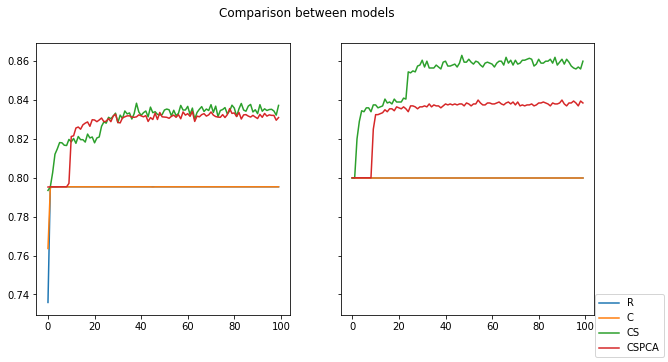

In [36]:
import pandas as pd
from sklearn.pipeline import make_pipeline

#Load data---
data = pd.read_csv('resources/Churn_Modelling.csv')
X = data.iloc[:, 3:-1].values
y = data.iloc[:, -1].values

#Build each model---
#Raw
model1 = Pipeline([('preprocessing', preprocessing_pipeline(categorical_features=[1,2], center=False, scale=False, pca=False)),
                   ('nn', basic_ann_architecture())])

#Mean cancellation
model2 = Pipeline([('preprocessing', preprocessing_pipeline(categorical_features=[1,2], center=True, scale=False, pca=False)),
                   ('nn', basic_ann_architecture())])

#Mean cancellation + Covariance Equalization
model3 = Pipeline([('preprocessing', preprocessing_pipeline(categorical_features=[1,2], center=True, scale=True, pca=False)),
                   ('nn', basic_ann_architecture())])

#Mean cancellation + Covariance Equalization + KL-Expansion
model4 = Pipeline([('preprocessing', preprocessing_pipeline(categorical_features=[1,2], center=True, scale=True, pca=True)),
                   ('nn', basic_ann_architecture())])

#Use the framework---
compare_models([model1, model2, model3, model4], 
               ['R','C','CS','CSPCA'], 
               (X,y), epochs=100)


# Model Comparison: Architectures

### Hypothesis:

Architectural definitions such as number of layers, size of layers and activation functions can have a powerful impact on your results.

### Methodology

We will train four different models and compare their results using the framework defined above. As seen above, we will perform full input normalization.

* Shallow small: 1 hidden layer, 10 nodes, ReLU activations.
* Deep small: 5 hidden layers, 10 nodes each, ReLU activations.
* Shallow large: 1 hidden layer, 100 nodes, ReLU activations.
* Deep large: 5 hidden layers, 100 nodes each, ReLU activations.

### Results

* For this specific case, seems like a larger size (more nodes) is better than depth (more layers). Learning converges quickly with a small amount of nodes, but the results are bad.
* Deep networks tend to overfit. Architecturally speaking it should be better to experiment with a node amount increase instead of increasing layers.

Started training of Shallow small


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Started training of Deep small


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Started training of Shallow large


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Started training of Deep large


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Model Shallow small execution time: 32.056621 seconds.
Model Shallow small mean train score for last 10 epochs: 0.796188 - min/max: (0.795875 - 0.796625)
Model Shallow small mean val score for last 10 epochs: 0.795000 - min/max: (0.795000 - 0.795000)
Model Deep small execution time: 45.306695 seconds.
Model Deep small mean train score for last 10 epochs: 0.796425 - min/max: (0.795875 - 0.796750)
Model Deep small mean val score for last 10 epochs: 0.795000 - min/max: (0.795000 - 0.795000)
Model Shallow large execution time: 41.660923 seconds.
Model Shallow large mean train score for last 10 epochs: 0.866663 - min/max: (0.864750 - 0.868500)
Model Shallow large mean val score for last 10 epochs: 0.863000 - min/max: (0.861000 - 0.866000)
Model Deep large execution time: 81.800248 seconds.
Model Deep large mean train score for last 10 epochs: 0.911250 - min/max: (0.909000 - 0.916125)
Model Deep large mean val score for last 10 epochs: 0.841150 - min/max: (0.835000 - 0.848500)


<Figure size 432x288 with 0 Axes>

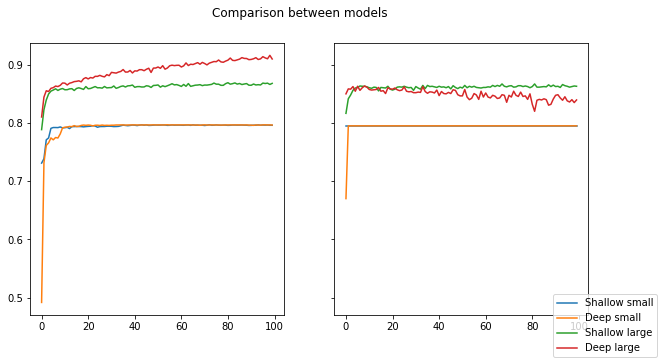

In [37]:
import pandas as pd
from sklearn.pipeline import make_pipeline

#Load data---
data = pd.read_csv('resources/Churn_Modelling.csv')
X = data.iloc[:, 3:-1].values
y = data.iloc[:, -1].values

#Build each model---
#Raw
model1 = Pipeline([('preprocessing', preprocessing_pipeline(categorical_features=[1,2], center=False, scale=False, pca=False)),
                   ('nn', custom_ann_architecture([10, 1], ['relu','sigmoid']))])

#Mean cancellation
model2 = Pipeline([('preprocessing', preprocessing_pipeline(categorical_features=[1,2], center=True, scale=False, pca=False)),
                   ('nn', custom_ann_architecture([10,10,10,10,10,1], ['relu','relu','relu','relu','relu','sigmoid']))])

#Mean cancellation + Covariance Equalization
model3 = Pipeline([('preprocessing', preprocessing_pipeline(categorical_features=[1,2], center=True, scale=True, pca=False)),
                   ('nn', custom_ann_architecture([100, 1], ['relu','sigmoid']))])

#Mean cancellation + Covariance Equalization + KL-Expansion
model4 = Pipeline([('preprocessing', preprocessing_pipeline(categorical_features=[1,2], center=True, scale=True, pca=True)),
                   ('nn', custom_ann_architecture([100,100,100,100,100,1], ['relu','relu','relu','relu','relu','sigmoid']))])

#Use the framework---
compare_models([model1, model2, model3, model4], 
               ['Shallow small','Deep small','Shallow large','Deep large'], 
               (X,y), epochs=100)


# Evaluating and Tuning a Neural Network

In [61]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
import seaborn as sns

def build_classifier(optimizer):
    classifier = Sequential() #initialize the ANN
    classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_shape=(11,)))
    classifier.add(Dropout(rate=0.1))
    classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu')) 
    classifier.add(Dropout(rate=0.1))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn=build_classifier, verbose=0)
#Generate parameter grid to optimize the neural network
parameters = {'batch_size':[25, 32],
              'epochs':[25, 50, 100, 200],
              'optimizer':['adam','rmsprop']}

grid_search = GridSearchCV(classifier, parameters, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)

print('Accuracy of tuned model: %f', grid_search.best_score_)

Accuracy of tuned model: %f 0.839125


ToDo:

* Create a framework to make hypothesis testing easier:

Hypotheses/Questions:

** On Preprocessing **

* Centering (Mean Cancellation)
* Scaling (Covariance Equalization)
* Decorrelating (KL-Expansion)

** On Optimization **

* Optimizers: SGD, BGD, MBGD, ADAM
* Loss functions
* Hyperparameter tuning

** On Architecture **

* Activation functions
* Weight initialization
* Learning rates

** On Data **

* Dropping dummy variable column
* Shuffling data to generate maximum information content
* Perturbing the natural frequency of data

The plot I want to see is:

* x: epoch
* y: accuracy
* legend: model
* text: average fitting time on k runs

Allows me to analyze convergence, accuracy and speed.

In [3]:
#Load data
import pandas as pd

data = pd.read_csv('resources/Churn_Modelling.csv')

Started training of Raw
Started training of Centered
Started training of Centered+Scaled
Started training of Centered+Scaled+Decorr


C:\Anaconda3\lib\site-packages\matplotlib\legend.py:647: UserWarning: Unrecognized location "lower_right". Falling back on "upper right"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


<Figure size 432x288 with 0 Axes>

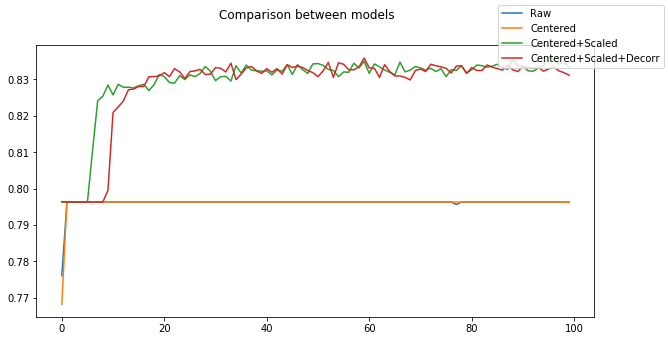